In [ ]:
pip install pytesseract


In [ ]:
ls -l /usr/local/lib/python3.12/site-packages/pytesseract/

In [ ]:
!sudo chmod 755 /usr/local/lib/python3.12/site-packages/pytesseract/pytesseract.py


In [ ]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'/usr/local/lib/python3.12/site-packages/pytesseract/pytesseract.py'

In [ ]:
!tesseract --version

In [ ]:
!sudo apt update
!sudo apt install -y tesseract-ocr


In [ ]:
!tesseract --version

True


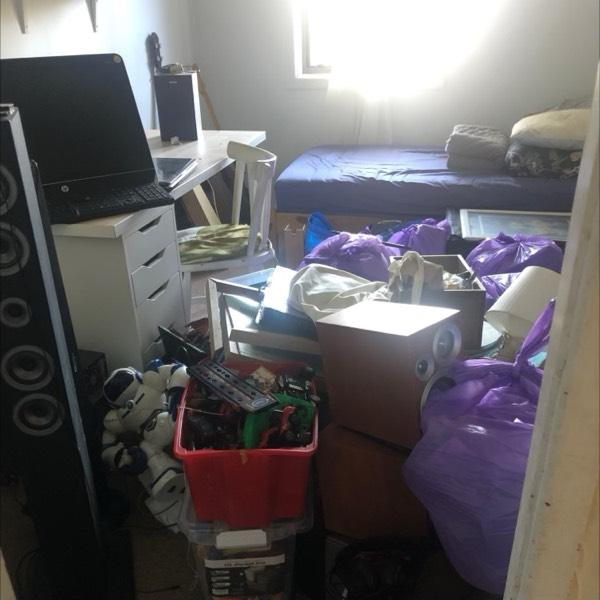

In [20]:
import os
import pandas as pd
from PIL import Image
import pytesseract

# Save the image temporarily
temp_image_path = "data/newimage_cropped/approved/6-Leslie-Street-North-Ryde-2113-Bedroom-1-alarm.jpg"

print(os.path.exists(temp_image_path))

try:
    img = Image.open(temp_image_path)
    img.show()
except Exception as e:

    print(e)

In [21]:
img = Image.open(temp_image_path).convert("RGB")

img.save("temp_image.jpg")

text = pytesseract.image_to_string("temp_image.jpg")
print(text)

TesseractError: (2, 'Usage: pytesseract [-l lang] input_file')

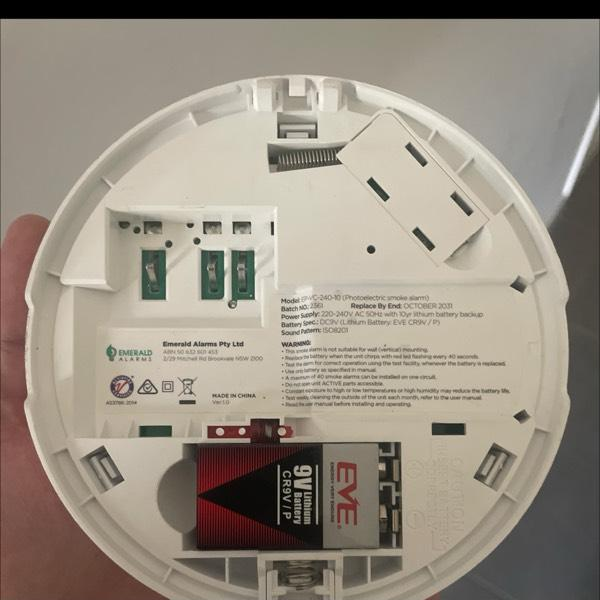

Extracted Text:
 



In [24]:
from PIL import Image
import pytesseract
import os

# Set the Tesseract executable path
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"  # Adjust for your environment

# Load the image
temp_image_path = "data/newimage_cropped/approved/724316147-smokealarm-entrance.jpg"
if not os.path.exists(temp_image_path):
    print(f"File not found: {temp_image_path}")
else:
    try:
        img = Image.open(temp_image_path).convert("RGB")
        img.show()  # Check if the image opens correctly

        # Save the image for debugging
        img.save("debug_image.jpg")
        
        # Perform OCR
        text = pytesseract.image_to_string(img, config="")
        print("Extracted Text:")
        print(text)

    except pytesseract.TesseractError as e:
        print(f"Tesseract Error: {e}")
    except Exception as e:
        print(f"Unexpected Error: {e}")


In [ ]:
from PIL import Image, ImageDraw
import pytesseract

# 테스트 이미지 생성
test_img = Image.new('RGB', (200, 100), color=(255, 255, 255))
draw = ImageDraw.Draw(test_img)
draw.text((10, 40), "Test OCR", fill=(0, 0, 0))
test_img.save("test_image.jpg")

test_img = test_img.convert("RGB")
# OCR 실행
text = pytesseract.image_to_string("test_image.jpg")
print("테스트 이미지에서 추출된 텍스트:")
print(text)


In [ ]:
text = pytesseract.image_to_string(img, config= "")
print(text)

In [ ]:
import os
import pandas as pd
from PIL import Image
import pytesseract

# Step 1: Load Metadata and Filter Approved Images
metadata = pd.read_csv('data/newimage.csv')
filtered_metadata = metadata[metadata['image_type'] == 'ExpiryImages']

approved_images_dir = 'data/newimage/approved'
approved_images = os.listdir(approved_images_dir)

# Step 2: Extract Text from Each Image and Store in Lists
image_text_data = {}

for img_name in approved_images:
    img_path = os.path.join(approved_images_dir, img_name)
    img = Image.open(img_path)

    # Extract text using OCR
    extracted_text = pytesseract.image_to_string(img)

    # Split text into lines and store in a list
    text_list = extracted_text.splitlines()
    text_list = [line.strip() for line in text_list if line.strip()]  # Remove empty lines

    # Save to dictionary
    image_text_data[img_name] = text_list

# Step 3: Display Results
for img_name, text_list in image_text_data.items():
    print(f"Image: {img_name}")
    print("Extracted Text:")
    print(text_list)
    print("-" * 40)

# Optional: Save Results to a File
results_df = pd.DataFrame({"image_name": image_text_data.keys(), "extracted_text": image_text_data.values()})
results_df.to_csv('data/initial_text_results.csv', index=False)

print("Processing complete. Results saved to 'data/initial_text_results.csv'.")
